Full explanation can be found in the following repository: https://github.com/AsiiaPine/BigHW2

Made in collaboration with:
* Anastasiia Stepanova (a.baranova@innopolis.university),
* Vyacheslav Koshman (v.koshman@innopolis.university)

### System Values

1. Directly measurable values
  1. $L$ - total length of the string
  1. $r$ - inner radius of the yoyo
  1. $m$ - mass of the yoyo
  1. $J$ - moment of inertia of the yoyo
  1. $h(t) = 0$ - motion of the hand
1. Proxy values
  1. $\eta \triangleq \frac{mr^2}{I + mr2}$ - characteristic parameter of the yoyo
  1. $\gamma \triangleq \frac{\eta}{r}$
  1. $e_{eq} = 1-2\eta$ - equivalent restitution coefficient

# Assumptions:

1. The center of mass of the yoyo moves only in the
vertical direction. The direction of the rotational axis is fixed and
always orthogonal to the vertical axis.
1. The string is flexible but not extensible. Its diameter and mass are negligible.
1. The friction is negligible, i.e., the friction coefficient $\epsilon = 0$.
1. The bottom phase consists of a kinematic rotation by $\pi$ and a dynamic impact such that
  1. The time needed for the rotation by $\pi$ is negligible.
  1. After the rotation by $\pi$, both the rotational and translational
velocities retain their initial values, respectively.
  1. The impact happens immediately after the rotation by p.
1. The transition phases are always complete, i.e.,
every transition phase ends before the yoyo enters another bottom
phase.
1. The restitution coefficient $e = 0$.
1. $\dot h(t)$ is always continuous, so that $\sigma_{\dot{h}}=0$.


# Motion

As proved by smart people in **Yoyo Dynamics: Sequence of Collisions Captured
by a Restitution Effect** by **Hui-Liang Jin** and **M. Zackenhouse**

$$
\begin{matrix}
\ddot{\theta} = - \gamma(g+\ddot{h}),
& \text{for }\theta(t)>0\\
\dot\theta(t^+_j)=-e_{eq}\dot\theta(t^-_j), & \text{ for }\theta(t_j) = 0 
\end{matrix}\\
y(t)=h(t)-L+r\theta(t)
$$
Liang and Zackenhouse [[1]](https://colab.research.google.com/drive/1XhoVi7SKO3oYObaG5tfao4a8jNgTDQ-P#scrollTo=ZKcjQU2C_OTW&line=1&uniqifier=1)

### Linear ODE

$$
\dot{X} = 
\begin{bmatrix}
\dot\theta\\
\ddot{\theta}
\end{bmatrix},\
A =
\begin{bmatrix}
0 & 1 \\
0 & 0
\end{bmatrix},\
X = 
\begin{bmatrix}
\theta\\
\dot{\theta}
\end{bmatrix},\
B = 
\begin{bmatrix}
0\\
-\gamma g
\end{bmatrix}
$$

In [ ]:
g = 981 # сm/s^2
L = 30 # cm
r = 0.65/2 # cm
m = 63.85 # g
J = m*(2.2530346**2) # g cm^2

In [ ]:
eta = m*r/(J + m*r)
gamma = eta/r
e_eq = 1-2*eta
print(r'\eta:', eta)
print(r'\gamma:', gamma)
print(r'e_{eq}:', e_eq)

\eta: 0.06017220460546493
\gamma: 0.18514524493989207
e_{eq}: 0.8796555907890702


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from functools import lru_cache

dt = 0.01
phase_t_min = 0.1

A = np.array([[0, 1],
              [0, 0]])
B = np.array([0, -gamma*g])
T = np.arange(0, 200, dt)

def flip(t, y):
  return y[0]
flip.terminal = True
flip.direction = -1

def f(t, y):
  return A@y + B

def get_data(L):
  X0 = np.array([L/r, 0])
  X = X0
  t = T[0]
  t_prev = -np.inf
  ans = np.empty((2,0))
  anst = np.empty(0)
  while t < T[-1] and (t - t_prev > phase_t_min):
    sol = solve_ivp(f, (t, T[-1]), X, t_eval=T[np.searchsorted(T, t):], events=flip)
    ans = np.concatenate((ans, sol.y), axis=1)
    anst = np.concatenate((anst, sol.t))
    X = sol.y[:,-1]
    X[1] = -e_eq*X[1]
    t_prev = t + np.pi/X[1]
    t = sol.t[-1]
    # print(t)
  return (anst, ans)

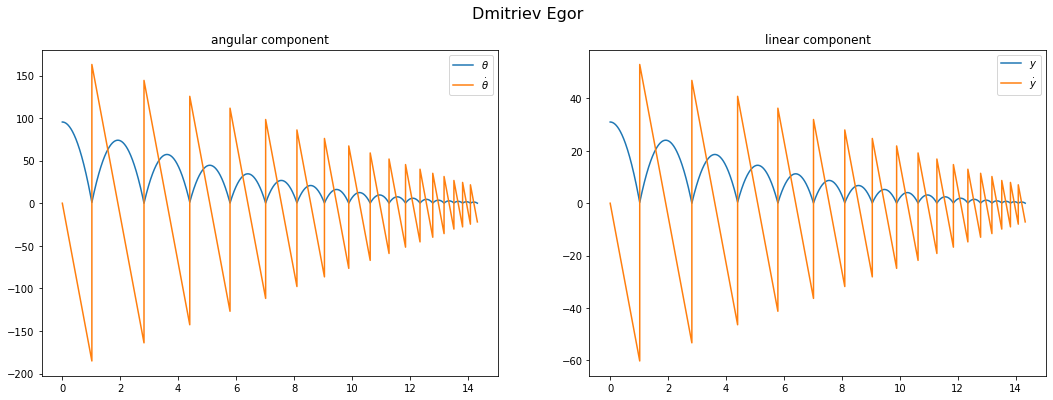

In [ ]:
data_t, data_X = get_data(31)

grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=(18,6))
fig.suptitle("Dmitriev Egor", fontsize=16)
ax1 = plt.subplot(grid[:, 0], title = 'angular component')
ax2 = plt.subplot(grid[:, 1], title = 'linear component')

ax1.plot(data_t, np.transpose(data_X))
lables1 = [r'$\theta$', r'$\dot{\theta}$']
ax1.legend(lables1)

ax2.plot(data_t, np.transpose(data_X)*r)
lables2 = [r'$y$', r'$\dot{y}$']
ax2.legend(lables2)

In [ ]:
import csv

titels = []
mesurments = []
for idx in range(6):
    mesurments.append([])


with open("data_output.csv", encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter = ",")
    fist_row = True
    for row in file_reader:
        if fist_row:
            titels = row
            fist_row = False
        else:
            for idx in range(6):
                if float(row[idx]) != -1.0:
                    mesurments[idx].append(float(row[idx]))

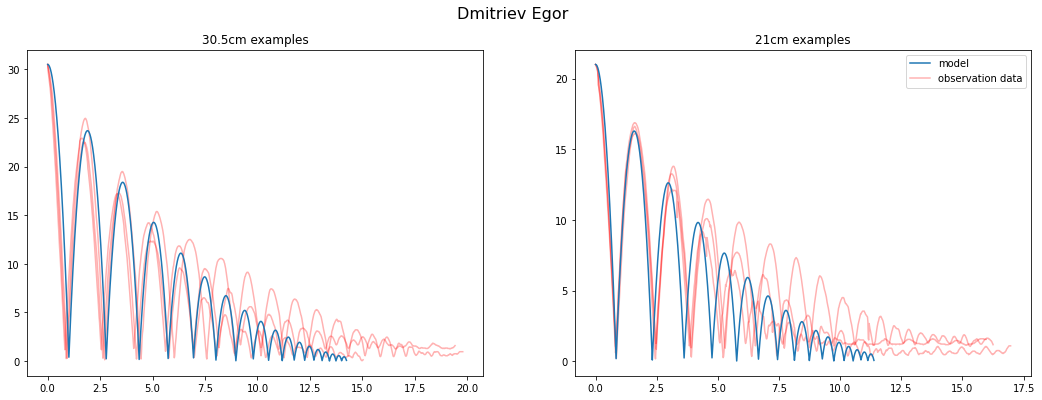

In [ ]:
grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=(18,6))
fig.suptitle("Dmitriev Egor", fontsize=16)

L = 30.5
ax1 = plt.subplot(grid[:, 0], title = f'{L}cm examples')
data_t, data_X = get_data(L)
for i in range(0, 3):
  time_ref = np.array(range(len(mesurments[i]) ))/60
  ax1.plot(time_ref, L-np.array(mesurments[i]), '-r', alpha=0.3)
ax1.plot(data_t, np.transpose(data_X)[:,0]*r)

L = 21
ax2 = plt.subplot(grid[:, 1], title = f'{L}cm examples')
data_t, data_X = get_data(L)
for i in range(3, 6):
  time_ref = np.array(range(len(mesurments[i]) ))/60
  l_r, = ax2.plot(time_ref, L-np.array(mesurments[i]), '-r', alpha=0.3)
l_b, = ax2.plot(data_t, np.transpose(data_X)[:,0]*r)

plt.legend([l_b, l_r], ['model', 'observation data'])

## Accounting for time spent on bottom flip 

As we can see this model yields poor results closer to the end of the simulation. It does not account for the time needed to make the turn at the end of the string and the error accumulates. It becomes more explicit when yoyo makes shorter trips to the top and spends relatively more time at the bottom making a turn. Let's propose a correction to the **Assumption 4.1**: let the time needed for the rotation by $\pi$ be $\frac{\pi}{\dot\theta}$ instead of $0$. By doing so we will account for the time yoyo makes a turn and reduce the error of our model in later stages of the simulation.

By doing so we'll have to correct our equations to the following:
$$
\begin{matrix}
\ddot{\theta} = - \gamma(g+\ddot{h}),
& \text{for }\theta(t)>0\\
\dot\theta(t^+_{j+\pi/|\dot\theta|})=-e_{eq}\dot\theta(t^-_j), & \text{ for }\theta(t_j) = 0 
\end{matrix}\\
y(t)=h(t)-L+r\theta(t)
$$

In [ ]:
def get_data2(L):
  X0 = np.array([L/r, 0])
  X = X0
  t = T[0]
  t_prev = -np.inf
  ans = np.empty((2,0))
  anst = np.empty(0)
  while t < T[-1] and (t - t_prev > phase_t_min):
    sol = solve_ivp(f, (t, T[-1]), X, t_eval=T[np.searchsorted(T, t):], events=flip)
    ans = np.concatenate((ans, sol.y), axis=1)
    anst = np.concatenate((anst, sol.t))
    X = sol.y[:,-1]
    X[1] = -e_eq*X[1]
    t_prev = t + np.pi/X[1] + np.pi/X[1]
    t = sol.t[-1] + np.pi/X[1] + np.pi/X[1]
    # print(t)
  return (anst, ans)

Now let's compare the results

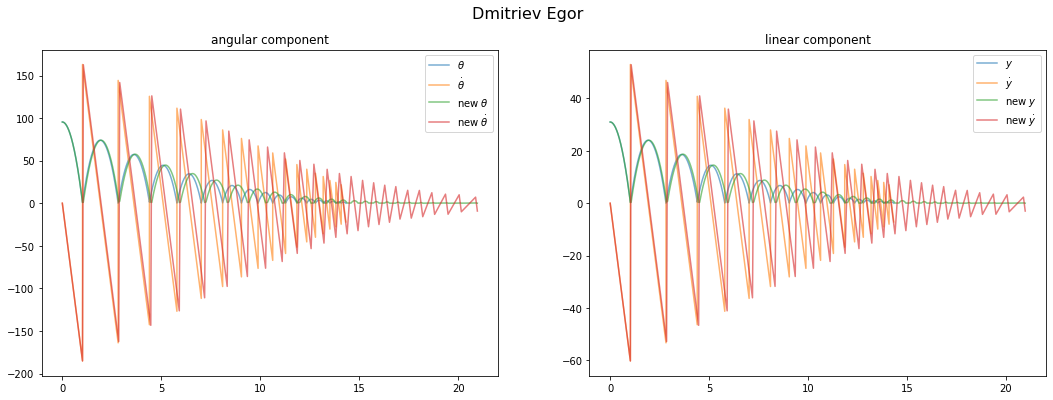

In [ ]:
data_t, data_X = get_data(31)
data_t2, data_X2 = get_data2(31)

grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=(18,6))
fig.suptitle("Dmitriev Egor", fontsize=16)
ax1 = plt.subplot(grid[0, 0], title = 'angular component')
ax2 = plt.subplot(grid[0, 1], title = 'linear component')

ax1.plot(data_t, np.transpose(data_X), alpha = 0.6)
ax2.plot(data_t, np.transpose(data_X)*r, alpha = 0.6)

ax1.plot(data_t2, np.transpose(data_X2), alpha = 0.6)
ax2.plot(data_t2, np.transpose(data_X2)*r, alpha = 0.6)
lables1 = [r'$\theta$', r'$\dot{\theta}$', r'new $\theta$', r'new $\dot{\theta}$']
lables2 = [r'$y$', r'$\dot{y}$', r'new $y$', r'new $\dot{y}$']
ax1.legend(lables1)
ax2.legend(lables2)

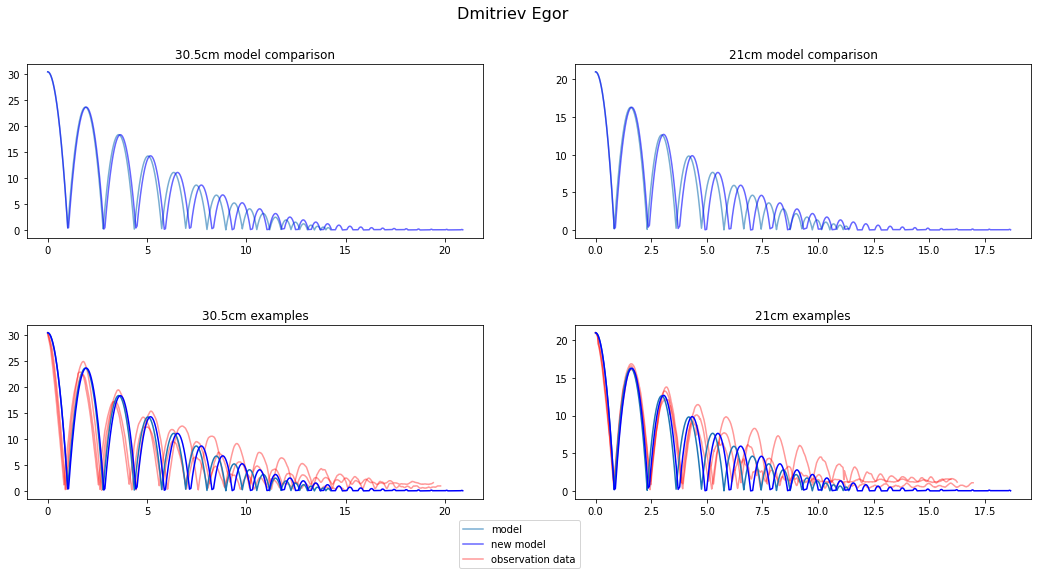

In [ ]:
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=(18,8))
fig.suptitle("Dmitriev Egor", fontsize=16)

L = 30.5
ax1 = plt.subplot(grid[0, 0], title = f'{L}cm model comparison')
ax3 = plt.subplot(grid[1, 0], title = f'{L}cm examples')
data_t, data_X = get_data(L)
data_t2, data_X2 = get_data2(L)
for i in range(0, 3):
  time_ref = np.array(range(len(mesurments[i]) ))/60
  ax3.plot(time_ref, L-np.array(mesurments[i]), '-r', alpha=0.4)
ax3.plot(data_t, np.transpose(data_X)[:,0]*r)
ax3.plot(data_t2, np.transpose(data_X2)[:,0]*r, '-b')
ax1.plot(data_t, np.transpose(data_X)[:,0]*r, alpha = 0.6)
ax1.plot(data_t2, np.transpose(data_X2)[:,0]*r, '-b', alpha = 0.6)

L = 21
ax2 = plt.subplot(grid[0, 1], title = f'{L}cm model comparison')
ax4 = plt.subplot(grid[1, 1], title = f'{L}cm examples')
data_t, data_X = get_data(L)
data_t2, data_X2 = get_data2(L)
for i in range(3, 6):
  time_ref = np.array(range(len(mesurments[i]) ))/60
  l_r, = ax4.plot(time_ref, L-np.array(mesurments[i]), '-r', alpha=0.4)
ax4.plot(data_t, np.transpose(data_X)[:,0]*r)
ax4.plot(data_t2, np.transpose(data_X2)[:,0]*r, '-b')
l_b, = ax2.plot(data_t, np.transpose(data_X)[:,0]*r, alpha = 0.6)
l_b2, = ax2.plot(data_t2, np.transpose(data_X2)[:,0]*r, '-b', alpha = 0.6)


fig.legend([l_b, l_b2, l_r], ['model', 'new model', 'observation data'], loc='lower center')

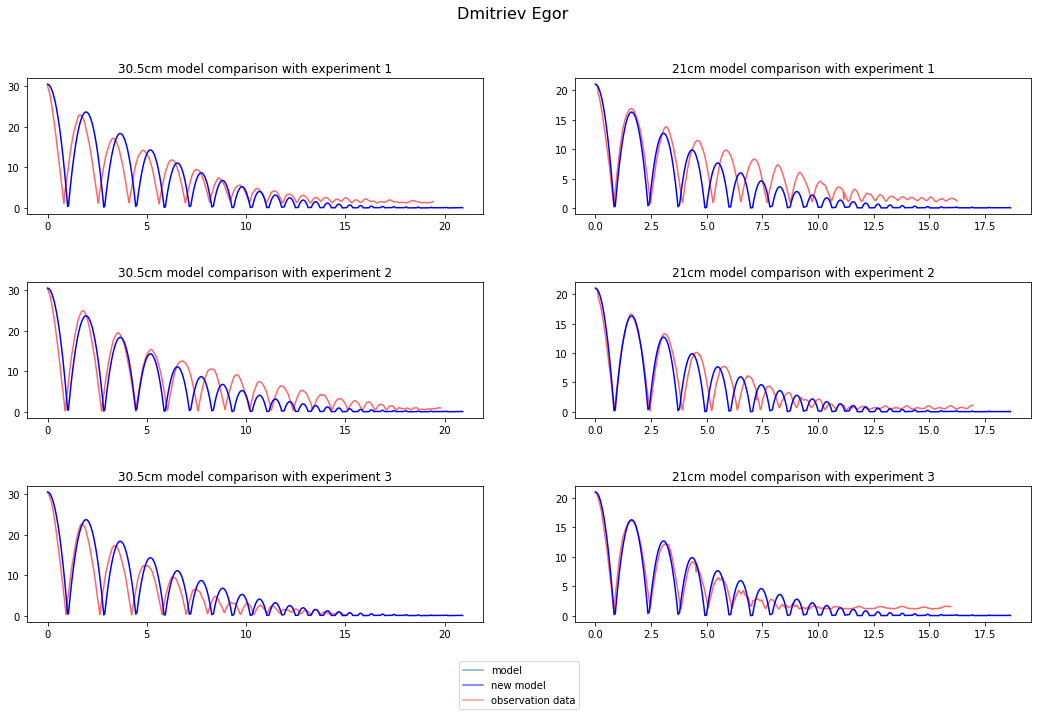

In [ ]:
grid = plt.GridSpec(3, 2, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=(18,10))
fig.suptitle("Dmitriev Egor", fontsize=16)

for i in range(3):
  L = 30.5
  
  data_t2, data_X2 = get_data2(L)
  axt = plt.subplot(grid[i, 0], title = f'{L}cm model comparison with experiment {i+1}')
  
  time_ref = np.array(range(len(mesurments[i]) ))/60
  axt.plot(time_ref, L-np.array(mesurments[i]), '-r', alpha=0.6)
  axt.plot(data_t2, np.transpose(data_X2)[:,0]*r, '-b')

  
for i in range(3):
  L = 21
  
  data_t2, data_X2 = get_data2(L)
  axt = plt.subplot(grid[i, 1], title = f'{L}cm model comparison with experiment {i+1}')
  
  time_ref = np.array(range(len(mesurments[i+3]) ))/60
  axt.plot(time_ref, L-np.array(mesurments[i+3]), '-r', alpha=0.6)
  axt.plot(data_t2, np.transpose(data_X2)[:,0]*r, '-b')

  
fig.legend([l_b, l_b2, l_r], ['model', 'new model', 'observation data'], loc='lower center')

## $\underline{\text{Final Results!}}$

In [ ]:
from sklearn.metrics import mean_absolute_error

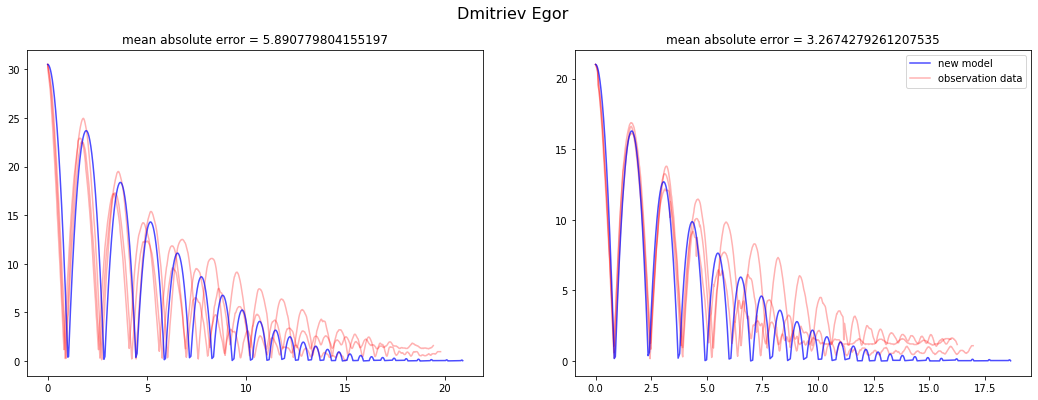

In [ ]:
grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.5)
fig = plt.figure(figsize=(18,6))
fig.suptitle("Dmitriev Egor", fontsize=16)

L = 30.5
data_t2, data_X2 = get_data2(L)

MAE = np.array([mean_absolute_error(L-np.array(mesurments[i]), np.transpose(data_X2)[:len(mesurments[i]),0]*r) for i in range(0, 3)])
MAE_mean = sum(MAE)/3

ax1 = plt.subplot(grid[:, 0], title = f'mean absolute error = {MAE_mean}')
for i in range(0, 3):
  time_ref = np.array(range(len(mesurments[i]) ))/60
  ax1.plot(time_ref, L-np.array(mesurments[i]), '-r', alpha=0.3)
ax1.plot(data_t2, np.transpose(data_X2)[:,0]*r, '-b', alpha=0.7)

L = 21
data_t2, data_X2 = get_data2(L)

MAE = np.array([mean_absolute_error(L-np.array(mesurments[i]), np.transpose(data_X2)[:len(mesurments[i]),0]*r) for i in range(3, 6)])
MAE_mean = sum(MAE)/3

ax2 = plt.subplot(grid[:, 1], title = f'mean absolute error = {MAE_mean}')
for i in range(3, 6):
  time_ref = np.array(range(len(mesurments[i]) ))/60
  l_r, = ax2.plot(time_ref, L-np.array(mesurments[i]), '-r', alpha=0.3)
l_b2, = ax2.plot(data_t2, np.transpose(data_X2)[:,0]*r, '-b', alpha=0.7)

plt.legend([l_b2, l_r], ['new model', 'observation data'])

:[1] H. Liang and J. Zackenhouse, “Yoyo Dynamics: Sequence of Collisions Captured by a Restitution Effect,” Sep. 2002, doi: 10.1115/1.1485750͔.